# TechCareer Machine Learning Bootcamp Homework 1 

## Introduction 

This project aim to writing sorting alghoritms without using libaries and compared to sorting alghoritms and observing datas size effect to exectution time of alghoritms

## Importing Libaries

In [1]:
from timeit import default_timer as timer   #For calculating process time
import random as rd                         #For generating random data                                            
import seaborn as sns                       #For generating graph  
import matplotlib.pyplot as plt             #For generating graph     
import pandas as pd                         #For generating graph data from process time lists  

## Sorting Algorithms Class 

In [2]:
class SortingAlgorithms:
    @staticmethod
    def bubble_sort(arr):
        n = len(arr)
        for i in range(n):
            for j in range(0, n-i-1):
                if arr[j] > arr[j+1]:
                    arr[j], arr[j+1] = arr[j+1], arr[j]
        return arr

    @staticmethod
    def selection_sort(arr):
        n = len(arr)
        for i in range(n):
            min_index = i
            for j in range(i+1, n):
                if arr[min_index] > arr[j]:
                    min_index = j
            arr[i], arr[min_index] = arr[min_index], arr[i]
        return arr

    @staticmethod
    def insertion_sort(arr):
        n = len(arr)
        for i in range(1, n):
            key = arr[i]
            j = i - 1
            while j >= 0 and key < arr[j]:
                arr[j+1] = arr[j]
                j -= 1
            arr[j+1] = key
        return arr

    @staticmethod
    def quick_sort(arr, start=0, stop=-1):#that part for run function without need data lenght as input
        if stop == -1:
            stop = len(arr) - 1
        if start < stop:
            pivot = SortingAlgorithms.part_sort(arr, start, stop)# Finding pivot location
            SortingAlgorithms.quick_sort(arr, start, pivot-1)#Selecting numbers lower than pivot and pivot location recursively 
            SortingAlgorithms.quick_sort(arr, pivot+1, stop)#Selecting numbers higher than pivot and pivot location recursively 

    @staticmethod
    def part_sort(arr, start, stop):#That function for divide list which part contain numbers lower than pivot has to parts and return pivot's right position
        pivot = arr[stop]
        i = start - 1
        for j in range(start, stop):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i+1], arr[stop] = arr[stop], arr[i+1]
        return i+1

    @staticmethod
    def merge_sort(arr):
        if len(arr) > 1:
            middle = len(arr) // 2
            left = arr[:middle]
            right = arr[middle:]
            SortingAlgorithms.merge_sort(left)#That part for sort left of middle
            SortingAlgorithms.merge_sort(right)#That part for sort Right of middle
            i = j = k = 0
            #Comparing left of middle elements by right of middle
            while i < len(left) and j < len(right):
                if left[i] <= right[j]:
                    arr[k] = left[i]
                    i += 1
                else:
                    arr[k] = right[j]
                    j += 1
                k += 1
            #Checking if Right of middle list finished
            while i < len(left):
                arr[k] = left[i]
                i += 1
                k += 1
            #Checking if Left of middle list finished
            while j < len(right):
                arr[k] = right[j]
                j += 1
                k += 1

    @staticmethod
    def heap_sort(arr):
        N = len(arr)
        #Build maxheap
        for i in range(N//2 - 1, -1, -1):
            SortingAlgorithms.make_node(arr, N, i)
        #Delete elements one by one
        for i in range(N-1, 0, -1):
            arr[i], arr[0] = arr[0], arr[i]
            SortingAlgorithms.make_node(arr, i, 0)

    @staticmethod
    def make_node(arr, N, i):
        largest = i
        left = 2*i + 1
        right = 2*i + 2
        #Checking left child of node exist and greather than parent
        if left < N and arr[largest] < arr[left]:
            largest = left
        #Checking Right child of node exist and greather than parent
        if right < N and arr[largest] < arr[right]:
            largest = right
        #Checking any change at largest
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]

    @staticmethod
    def counting_sort(arr):
        # Find the maximum element in the inputArray
        max_element = arr[0]
        for i in range(1, len(arr)):
            if arr[i] > max_element:
                max_element = arr[i]
        count_array_length = max_element + 1
        # Initialize the countArray with (max+1) zeros
        count_array = [0] * count_array_length
        #Increase the corresponding count for every element by 1
        for el in arr:
            count_array[el] += 1
        #Adding last element to current element for finding locations
        for i in range(1, count_array_length):
            count_array[i] += count_array[i - 1]
        output_arr = [0] * len(arr)
        i = len(arr) - 1
        while i >= 0:
            current_el = arr[i]
            count_array[current_el] -= 1
            new_position = count_array[current_el]
            output_arr[new_position] = current_el
            i -= 1
        return output_arr

    @staticmethod
    def radix_sort(arr):
        max_element = arr[0]
        for i in range(1, len(arr)):
            if arr[i] > max_element:
                max_element = arr[i]
        exp = 1
        while max_element / exp >= 1:
            SortingAlgorithms.counting_sort_exp(arr, exp)
            exp *= 10

    @staticmethod
    def counting_sort_exp(arr, exp):
        N = len(arr)
        output = [0] * N
        count = [0] * 10
        # Store count of occurrences in count[]
        for i in range(0, N):
            index = arr[i] // exp
            count[index % 10] += 1
        for i in range(1, 10):
            count[i] += count[i - 1]
        i = N - 1
        while i >= 0:
            index = arr[i] // exp
            output[count[index % 10] - 1] = arr[i]
            count[index % 10] -= 1
            i -= 1
        i = 0
        for i in range(0, len(arr)):
            arr[i] = output[i]

    @staticmethod
    def topological_sort(graph):
        def depth_search(node):
            visited[node] = True
            for neighbor in graph[node]:
                if not visited[neighbor]:#For finding a node which is not connect any other node
                    depth_search(neighbor)
            result.append(node)

        visited = {node: False for node in graph}
        result = []

        for node in graph:
            if not visited[node]:
                depth_search(node)

        return result[::-1]
    
    @staticmethod
    def print_sorting_times(arr):
        sorting_functions = [
            SortingAlgorithms.bubble_sort,
            SortingAlgorithms.selection_sort,
            SortingAlgorithms.insertion_sort,
            SortingAlgorithms.quick_sort,
            SortingAlgorithms.merge_sort,
            SortingAlgorithms.heap_sort,
            SortingAlgorithms.counting_sort,
            SortingAlgorithms.radix_sort
        ]

        execution_times = {}
        for sort_func in sorting_functions:
            arr_copy = arr.copy()
            start_time = timer()
            sorted_arr = sort_func(arr_copy)
            end_time = timer()
            execution_time = end_time - start_time
            execution_times[sort_func.__name__] = execution_time

        sorted_algorithms = sorted(execution_times, key=lambda k: execution_times[k])
        
        print("Execution times for sorting algorithms:")
        for algo in sorted_algorithms:
            print(f"{algo}: {execution_times[algo]:.6f} seconds")

        fastest_algorithms = sorted_algorithms[:3]
        slowest_algorithms = sorted_algorithms[-3:]

        print("\nRecommendations:")
        print("Fastest 3 algorithms for this datasets are:")
        for algo in fastest_algorithms:
            print(f"- {algo}: {execution_times[algo]:.6f} seconds")

        print("\nSlowest 3 algorithms for this datasets are:")
        for algo in slowest_algorithms:
            print(f"- {algo}: {execution_times[algo]:.6f} seconds")
        return execution_times

## Creating Test Data

In [3]:
orginal_data = [rd.randint(0,100) for _ in range(10)]
orginal_data

[94, 74, 67, 53, 18, 59, 86, 20, 84, 31]

## Testing Alghoritms

###  Bubble Sort

It is the most basic sorting algorithm that arranges elements by comparing two at a time and making necessary swaps. It is employed in situations involving sequential comparisons and in-place rearrangements.

In [4]:
bubleSortData = orginal_data.copy()
print("Data before Bubble Sort")
print(bubleSortData)
SortingAlgorithms.bubble_sort(bubleSortData)
print("Data After Bubble Sort")
print(bubleSortData)

Data before Bubble Sort
[94, 74, 67, 53, 18, 59, 86, 20, 84, 31]
Data After Bubble Sort
[18, 20, 31, 53, 59, 67, 74, 84, 86, 94]


###  Selection Sort

This algorithm operates by selecting either the largest or smallest element within a given dataset and subsequently proceeds to arrange the dataset in a sorted order. It is fundamentally characterized by its capacity to partition the dataset into two distinct segments.

In [5]:
selectionSortData = orginal_data.copy()
print("Data before Selection Sort")
print(selectionSortData)
SortingAlgorithms.selection_sort(selectionSortData)
print("Data After Selection Sort")
print(selectionSortData)

Data before Selection Sort
[94, 74, 67, 53, 18, 59, 86, 20, 84, 31]
Data After Selection Sort
[18, 20, 31, 53, 59, 67, 74, 84, 86, 94]


###  Insertion Sort

The algorithm partitions the dataset into contiguous subsequences, categorized as either ordered or unordered segments. Subsequently, it iteratively extracts an element from the unordered segment and inserts it into the ordered segment at its appropriate position. This cyclic process persists until all elements within the dataset have been systematically arranged.

In [6]:
insertionSortData = orginal_data.copy()
print("Data before Insertion Sort")
print(insertionSortData)
SortingAlgorithms.insertion_sort(insertionSortData)
print("Data After Insertion Sort")
print(insertionSortData)

Data before Insertion Sort
[94, 74, 67, 53, 18, 59, 86, 20, 84, 31]
Data After Insertion Sort
[18, 20, 31, 53, 59, 67, 74, 84, 86, 94]


###  Quick Sort

Using a pivot element, the dataset is divided into two segments: the left segment consists of elements smaller than the pivot, while the right segment contains elements greater than the pivot. Subsequently, this process is iteratively applied to both regions.

In [7]:
quickSortData = orginal_data.copy()
print("Data before Quick Sort")
print(quickSortData)
SortingAlgorithms.quick_sort(quickSortData)
print("Data After Quick Sort")
print(quickSortData)

Data before Quick Sort
[94, 74, 67, 53, 18, 59, 86, 20, 84, 31]
Data After Quick Sort
[18, 20, 31, 53, 59, 67, 74, 84, 86, 94]


###  Merge Sort

The data is divided into two halves, each of which is sorted separately. Subsequently, a merging process is employed. Time complexity analysis is employed in both the division and merging operations.

In [8]:
mergeSortData = orginal_data.copy()
print("Data before Merge Sort")
print(mergeSortData)
SortingAlgorithms.merge_sort(mergeSortData)
print("Data After Merge Sort")
print(mergeSortData)

Data before Merge Sort
[94, 74, 67, 53, 18, 59, 86, 20, 84, 31]
Data After Merge Sort
[18, 20, 31, 53, 59, 67, 74, 84, 86, 94]


###  Heap Sort

A heap data structure is established on an array, and the sorting process is carried out using this heap.

In [9]:
heapSortData = orginal_data.copy()
print("Data before Heap Sort")
print(heapSortData)
SortingAlgorithms.heap_sort(heapSortData)
print("Data After Heap Sort")
print(heapSortData)

Data before Heap Sort
[94, 74, 67, 53, 18, 59, 86, 20, 84, 31]
Data After Heap Sort
[18, 20, 74, 31, 59, 67, 53, 84, 86, 94]


###  Counting Sort

The sorting process takes into account the range of the dataset. It accomplishes sorting by tallying the frequency of occurrence for each individual element.

In [10]:
countingSortData = orginal_data.copy()
print("Data before Counting Sort")
print(countingSortData)
SortingAlgorithms.counting_sort(countingSortData)
print("Data After Counting Sort")
print(countingSortData)

Data before Counting Sort
[94, 74, 67, 53, 18, 59, 86, 20, 84, 31]
Data After Counting Sort
[94, 74, 67, 53, 18, 59, 86, 20, 84, 31]


###  Radix Sort

Elements are arranged based on their place values. This sorting method is employed for numerical data.

In [11]:
radixSortData = orginal_data.copy()
print("Data before Radix Sort")
print(radixSortData)
SortingAlgorithms.radix_sort(radixSortData)
print("Data After Radix Sort")
print(radixSortData)

Data before Radix Sort
[94, 74, 67, 53, 18, 59, 86, 20, 84, 31]
Data After Radix Sort
[18, 20, 31, 53, 59, 67, 74, 84, 86, 94]


###  Topological Sort

It is employed on directed acyclic graphs. The nodes within the graph are sorted according to their dependency order.

In [12]:
topologicalSortData = {
        'A': ['B', 'C'],
        'B': ['D', 'E'],
        'C': ['F'],
        'D': [],
        'E': ['F'],
        'F': [],
    }
print("Data before Topological Sort")
print(topologicalSortData)
topologicalSortData = SortingAlgorithms.topological_sort(topologicalSortData)
print("Data After Topological Sort")
print(topologicalSortData)

Data before Topological Sort
{'A': ['B', 'C'], 'B': ['D', 'E'], 'C': ['F'], 'D': [], 'E': ['F'], 'F': []}
Data After Topological Sort
['A', 'C', 'B', 'E', 'F', 'D']


## Time Analysis Of Alghoritms

At this part we compare All alghoritims except Topological sort because this function needs graph but other functions can work with only list of data. We compare Alghoritms speed for 10 data, 100 data, 1000 data and 10000 data

### 10 data Time Analysis 

In [13]:
data = [rd.randint(0,100) for _ in range(10)]
ExecutionTimes10 = SortingAlgorithms.print_sorting_times(data)

Execution times for sorting algorithms:
insertion_sort: 0.000003 seconds
selection_sort: 0.000006 seconds
heap_sort: 0.000007 seconds
bubble_sort: 0.000009 seconds
counting_sort: 0.000011 seconds
radix_sort: 0.000014 seconds
merge_sort: 0.000015 seconds
quick_sort: 0.000019 seconds

Recommendations:
Fastest 3 algorithms for this datasets are:
- insertion_sort: 0.000003 seconds
- selection_sort: 0.000006 seconds
- heap_sort: 0.000007 seconds

Slowest 3 algorithms for this datasets are:
- radix_sort: 0.000014 seconds
- merge_sort: 0.000015 seconds
- quick_sort: 0.000019 seconds


### 100 data Time Analysis 

In [14]:
data = [rd.randint(0,100) for _ in range(100)]
ExecutionTimes100 = SortingAlgorithms.print_sorting_times(data)

Execution times for sorting algorithms:
counting_sort: 0.000026 seconds
heap_sort: 0.000046 seconds
quick_sort: 0.000085 seconds
radix_sort: 0.000098 seconds
merge_sort: 0.000169 seconds
insertion_sort: 0.000170 seconds
selection_sort: 0.000219 seconds
bubble_sort: 0.000406 seconds

Recommendations:
Fastest 3 algorithms for this datasets are:
- counting_sort: 0.000026 seconds
- heap_sort: 0.000046 seconds
- quick_sort: 0.000085 seconds

Slowest 3 algorithms for this datasets are:
- insertion_sort: 0.000170 seconds
- selection_sort: 0.000219 seconds
- bubble_sort: 0.000406 seconds


### 1000 data Time Analysis 

In [15]:
data = [rd.randint(0,100) for _ in range(1000)]
ExecutionTimes1000 = SortingAlgorithms.print_sorting_times(data)

Execution times for sorting algorithms:
counting_sort: 0.000220 seconds
heap_sort: 0.000441 seconds
radix_sort: 0.001099 seconds
quick_sort: 0.001636 seconds
merge_sort: 0.001975 seconds
insertion_sort: 0.021241 seconds
selection_sort: 0.025640 seconds
bubble_sort: 0.058802 seconds

Recommendations:
Fastest 3 algorithms for this datasets are:
- counting_sort: 0.000220 seconds
- heap_sort: 0.000441 seconds
- radix_sort: 0.001099 seconds

Slowest 3 algorithms for this datasets are:
- insertion_sort: 0.021241 seconds
- selection_sort: 0.025640 seconds
- bubble_sort: 0.058802 seconds


### 10000 data Time Analysis 

In [16]:
data = [rd.randint(0,100) for _ in range(10000)]
ExecutionTimes10000 = SortingAlgorithms.print_sorting_times(data)

Execution times for sorting algorithms:
counting_sort: 0.002220 seconds
heap_sort: 0.004659 seconds
radix_sort: 0.011656 seconds
merge_sort: 0.026221 seconds
quick_sort: 0.068540 seconds
insertion_sort: 2.365215 seconds
selection_sort: 2.573308 seconds
bubble_sort: 6.567397 seconds

Recommendations:
Fastest 3 algorithms for this datasets are:
- counting_sort: 0.002220 seconds
- heap_sort: 0.004659 seconds
- radix_sort: 0.011656 seconds

Slowest 3 algorithms for this datasets are:
- insertion_sort: 2.365215 seconds
- selection_sort: 2.573308 seconds
- bubble_sort: 6.567397 seconds


### Comparing Alghoritm Performances

#### Preapere graph datas 

In [17]:
x_label = [10,100,1000,10000]

bubble_sort_execution_times = [ExecutionTimes10["bubble_sort"],
                               ExecutionTimes100["bubble_sort"],
                               ExecutionTimes1000["bubble_sort"],
                               ExecutionTimes10000["bubble_sort"]]

selection_sort_execution_times = [ExecutionTimes10["selection_sort"],
                                  ExecutionTimes100["selection_sort"],
                                  ExecutionTimes1000["selection_sort"],
                                  ExecutionTimes10000["selection_sort"]]

insertion_sort_execution_times = [ExecutionTimes10["insertion_sort"],
                                  ExecutionTimes100["insertion_sort"],
                                  ExecutionTimes1000["insertion_sort"],
                                  ExecutionTimes10000["insertion_sort"]]

quick_sort_execution_times = [ExecutionTimes10["quick_sort"],
                              ExecutionTimes100["quick_sort"],
                              ExecutionTimes1000["quick_sort"],
                              ExecutionTimes10000["quick_sort"]]

merge_sort_execution_times = [ExecutionTimes10["merge_sort"],
                              ExecutionTimes100["merge_sort"],
                              ExecutionTimes1000["merge_sort"],
                              ExecutionTimes10000["merge_sort"]]

heap_sort_execution_times = [ExecutionTimes10["heap_sort"],
                             ExecutionTimes100["heap_sort"],
                             ExecutionTimes1000["heap_sort"],
                             ExecutionTimes10000["heap_sort"]]

counting_sort_execution_times = [ExecutionTimes10["counting_sort"],
                                 ExecutionTimes100["counting_sort"],
                                 ExecutionTimes1000["counting_sort"],
                                 ExecutionTimes10000["counting_sort"]]

radix_sort_execution_times = [ExecutionTimes10["radix_sort"],
                              ExecutionTimes100["radix_sort"],
                              ExecutionTimes1000["radix_sort"],
                              ExecutionTimes10000["radix_sort"]]
data = {
    'X': x_label,
    'Bubble Sort': bubble_sort_execution_times,
    'Selection Sort': selection_sort_execution_times,
    'Insertion Sort': insertion_sort_execution_times,
    'Quick Sort': quick_sort_execution_times,
    'Merge Sort': merge_sort_execution_times,
    'Heap Sort': heap_sort_execution_times,
    'Counting Sort': counting_sort_execution_times,
    'Radix Sort': radix_sort_execution_times
}

df = pd.DataFrame(data)

#### Plotting graph 

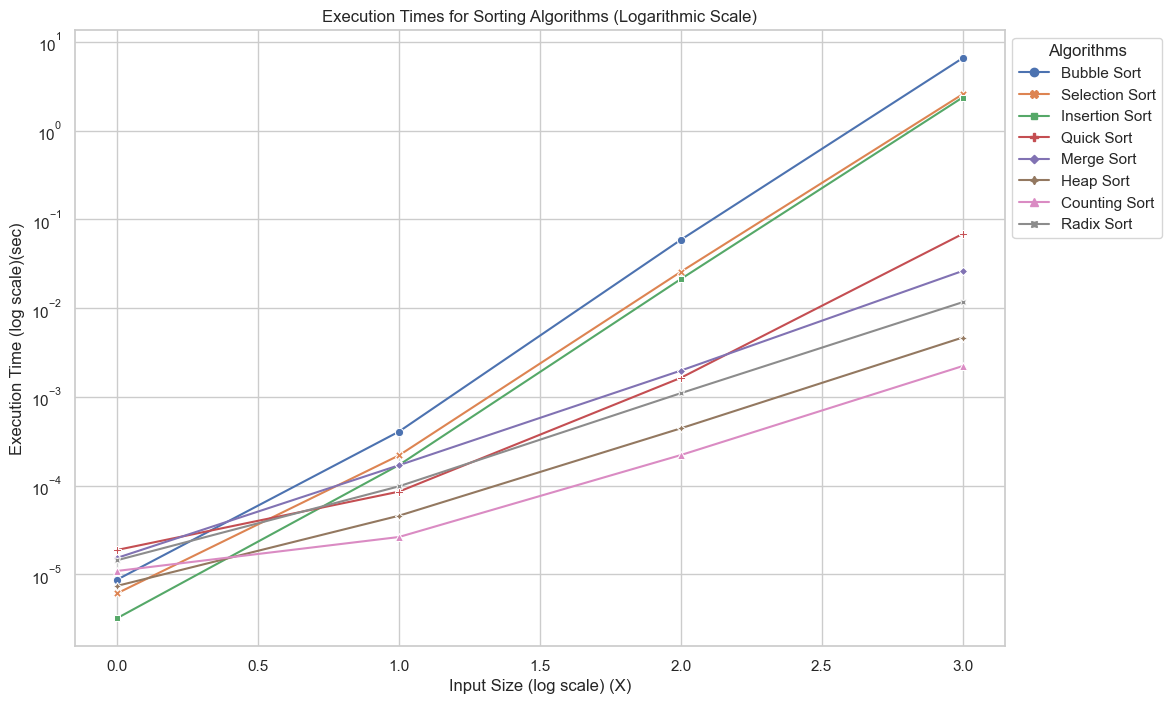

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=df.drop('X', axis=1), markers=True, dashes=False)

ax.set(xlabel='Input Size (log scale) (X)', ylabel='Execution Time (log scale)(sec)')
plt.title('Execution Times for Sorting Algorithms (Logarithmic Scale)')

ax.set_yscale('log')

plt.legend(title='Algorithms', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## Results and Conculution

As you can see from figure Bubble Sort, Selection Sort, and Insertion Sort demonstrate efficient performance for small dataset sizes. However, their efficiency significantly diminishes as the dataset size grows. Conversely, Radix Sort, Counting Sort, and Heap Sort emerge as the most efficient algorithms as the dataset size increases. This highlights the importance of selecting a sorting algorithm tailored to the specific dataset size. Optimal algorithm choice should be guided by the dataset's size to achieve optimal sorting performance.